In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Source of CSV file
# https://stats.oecd.org/Index.aspx?DataSetCode=MIG

In [3]:
# Code to read the CSV File from OECD.org
# Flag codes and Flags columns were removed
# Place CSV file within same directory as Jupyter Notebook

data = pd.read_csv("MIG_01052022002510906.csv", low_memory = False)
data1=data.drop(["Flag Codes","Flags"], axis = 1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315596 entries, 0 to 315595
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CO2                           315596 non-null  object 
 1   Country of birth/nationality  315596 non-null  object 
 2   VAR                           315596 non-null  object 
 3   Variable                      315596 non-null  object 
 4   GEN                           315596 non-null  object 
 5   Gender                        315596 non-null  object 
 6   COU                           315596 non-null  object 
 7   Country                       315596 non-null  object 
 8   YEA                           315596 non-null  int64  
 9   Year                          315596 non-null  int64  
 10  Value                         315569 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 26.5+ MB


In [4]:
# Code for the data to be used
# All rows with Total as the country of birth/nationality were removed
data2= data1.drop(data1.index[data1["Country of birth/nationality"]=="Total"])
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313400 entries, 0 to 315595
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CO2                           313400 non-null  object 
 1   Country of birth/nationality  313400 non-null  object 
 2   VAR                           313400 non-null  object 
 3   Variable                      313400 non-null  object 
 4   GEN                           313400 non-null  object 
 5   Gender                        313400 non-null  object 
 6   COU                           313400 non-null  object 
 7   Country                       313400 non-null  object 
 8   YEA                           313400 non-null  int64  
 9   Year                          313400 non-null  int64  
 10  Value                         313373 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 28.7+ MB


In [5]:
# The types of immigration data available
print(data1["Variable"].unique())

['Inflows of foreign population by nationality'
 'Outflows of foreign population by nationality'
 'Stock of foreign-born population by country of birth'
 'Stock of foreign population by nationality']


In [6]:
# Total immigration values for all countries over all time periods
var = data2.groupby("Variable")["Value"].sum()
var.apply(lambda x:'%.0f'%x)

Variable
Inflows of foreign population by nationality             109754711
Outflows of foreign population by nationality             44522919
Stock of foreign population by nationality               962887700
Stock of foreign-born population by country of birth    1687156613
Name: Value, dtype: object

In [7]:
# Total number of countries for analysis
data2["Country"].nunique()

35

In [8]:
# List of country options for analysis
country1 = data2["Country"].unique().tolist()
country1

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Japan',
 'Korea',
 'Luxembourg',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Slovak Republic',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Kingdom',
 'United States',
 'Chile',
 'Estonia',
 'Slovenia',
 'Israel',
 'Portugal',
 'Latvia']

In [9]:
# Total and Average Inflows of foreign populations each year
print ( "Total Inflows of foreign population by nationality each year, average inflow per country")
inflow_sum = data2[data2["Variable"]=="Inflows of foreign population by nationality"].groupby("Year")["Value"].sum().round(2)
inflow_avg = data2[data2["Variable"]=="Inflows of foreign population by nationality"].groupby("Year")["Value"].mean().round(2)
year = data2["Year"].unique()
for year,inflow_sum,inflow_avg in zip(year,inflow_sum,inflow_avg):
    print (year,":",inflow_sum,",",inflow_avg)

Total Inflows of foreign population by nationality each year, average inflow per country
2000 : 3640208.0 , 974.88
2001 : 4168155.0 , 1110.03
2002 : 4164315.0 , 1086.15
2003 : 4016535.0 , 975.6
2004 : 4567174.0 , 1053.07
2005 : 4814423.0 , 1067.97
2006 : 5216700.0 , 1103.13
2007 : 5572323.0 , 1098.21
2008 : 5379662.0 , 1012.36
2009 : 4965333.0 , 925.68
2010 : 5075025.0 , 895.86
2011 : 5212814.0 , 968.92
2012 : 5242281.0 , 946.6
2013 : 5584203.0 , 1000.57
2014 : 5995638.0 , 1036.23
2015 : 6890664.0 , 1243.8
2016 : 7146456.0 , 1295.35
2017 : 7024904.0 , 1260.52
2018 : 7286758.0 , 1306.81
2019 : 7791140.0 , 1399.02


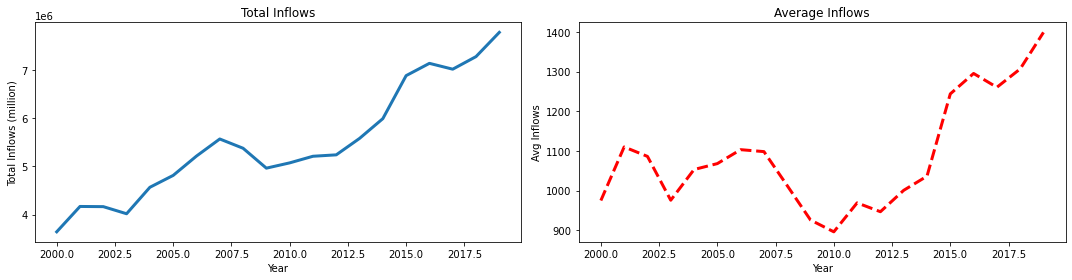

In [10]:
# Graph of Total and Average Inflows of foreign populations each year
inftotal_df = pd.DataFrame(data2[data2["Variable"]=="Inflows of foreign population by nationality"].groupby("Year")["Value"].sum().round(2))
infavg_df = pd.DataFrame(data2[data2["Variable"]=="Inflows of foreign population by nationality"].groupby("Year")["Value"].mean().round(2)) 

fig,axes = plt.subplots(nrows =1,ncols=2, figsize=(15,4))

axes[0].plot(inftotal_df, lw = 3)
axes[0].set_title("Total Inflows")
axes[0].set_ylabel("Total Inflows (million)")
axes[0].set_xlabel("Year")

axes[1].plot(infavg_df, color = "red", lw =3, ls = "--")
axes[1].set_title("Average Inflows")
axes[1].set_ylabel("Avg Inflows")
axes[1].set_xlabel("Year")

plt.tight_layout()

In [11]:
# Total and Average Outflows of foreign populations each year
print ( "Total Outflows of foreign populations each year, average outflow per country")
outflow_sum= data2[data2["Variable"]=="Outflows of foreign population by nationality"].groupby("Year")["Value"].sum().round(2)
outflow_avg= data2[data2["Variable"]=="Outflows of foreign population by nationality"].groupby("Year")["Value"].mean().round(2)
year = data2["Year"].unique()
for year,outflow_sum,outflow_avg in zip(year,outflow_sum,outflow_avg):
    print (year,":",outflow_sum,",",outflow_avg)

Total Outflows of foreign populations each year, average outflow per country
2000 : 1142687.0 , 430.88
2001 : 1136820.0 , 423.24
2002 : 1156134.0 , 413.79
2003 : 1219193.0 , 398.95
2004 : 1369340.0 , 419.91
2005 : 1401618.0 , 430.74
2006 : 1400540.0 , 407.13
2007 : 1479724.0 , 414.72
2008 : 1767844.0 , 495.61
2009 : 1969643.0 , 566.15
2010 : 2049596.0 , 547.58
2011 : 1975030.0 , 539.18
2012 : 2149274.0 , 564.26
2013 : 2302658.0 , 607.4
2014 : 2255503.0 , 591.22
2015 : 2312914.0 , 601.69
2016 : 2613660.0 , 709.08
2017 : 2600513.0 , 762.84
2018 : 2221490.0 , 798.81
2019 : 9998738.0 , 2470.04


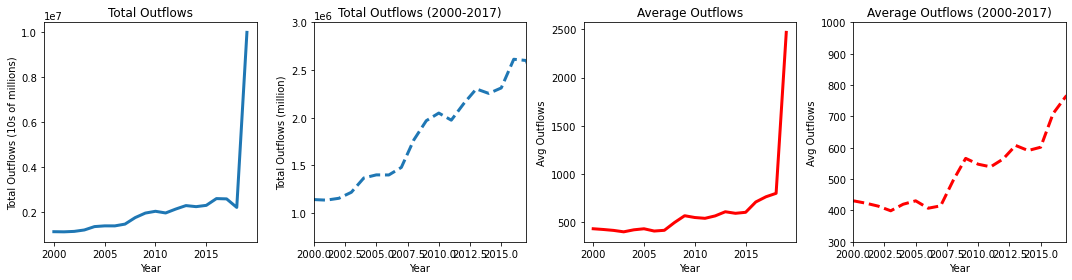

In [12]:
# Graph of Total and Average Outflows of foreign populations each year
outtotal_df = pd.DataFrame(data2[data2["Variable"]=="Outflows of foreign population by nationality"].groupby("Year")["Value"].sum().round(2))
outavg_df = pd.DataFrame(data2[data2["Variable"]=="Outflows of foreign population by nationality"].groupby("Year")["Value"].mean().round(2)) 

fig,axes = plt.subplots(nrows =1,ncols=4, figsize = (15,4))

axes[0].plot(outtotal_df, lw = 3)
axes[0].set_title("Total Outflows")
axes[0].set_ylabel("Total Outflows (10s of millions)")
axes[0].set_xlabel("Year")

axes[1].plot(outtotal_df, ls = "--", lw = 3)
axes[1].set_title("Total Outflows (2000-2017)")
axes[1].set_ylabel("Total Outflows (million)")
axes[1].set_xlabel("Year")
axes[1].set_xlim([2000,2017])
axes[1].set_ylim([700000,3000000])

axes[2].plot(outavg_df, color = "red", lw = 3)
axes[2].set_title("Average Outflows")
axes[2].set_ylabel("Avg Outflows")
axes[2].set_xlabel("Year")

axes[3].plot(outavg_df, color = "red",ls="--", lw =3)
axes[3].set_title("Average Outflows (2000-2017)")
axes[3].set_ylabel("Avg Outflows")
axes[3].set_xlabel("Year")
axes[3].set_xlim([2000,2017])
axes[3].set_ylim([300,1000])

plt.tight_layout()

In [13]:
# Total and Average Stock of foreign population by nationality each year
print ( "Total stock of foreign-born population by nationality each year, average stock by nationality per country")
stockn_sum= data2[data2["Variable"]=="Stock of foreign population by nationality"].groupby("Year")["Value"].sum().round(2)
stockn_avg= data2[data2["Variable"]=="Stock of foreign population by nationality"].groupby("Year")["Value"].mean().round(2)
year = data2["Year"].unique()
for year,stockn_sum,stockn_avg in zip(year,stockn_sum,stockn_avg):
    print (year,":",stockn_sum,",",stockn_avg)

Total stock of foreign-born population by nationality each year, average stock by nationality per country
2000 : 20890450.0 , 10652.96
2001 : 18713818.0 , 8720.33
2002 : 20181587.0 , 8855.46
2003 : 21504880.0 , 9024.29
2004 : 22478070.0 , 9747.65
2005 : 42848997.0 , 17263.9
2006 : 49069715.0 , 18207.69
2007 : 51799270.0 , 16036.93
2008 : 54227238.0 , 13556.81
2009 : 55086777.0 , 14274.88
2010 : 55918463.0 , 13848.06
2011 : 58415321.0 , 12378.75
2012 : 58396663.0 , 12536.85
2013 : 59315320.0 , 12278.06
2014 : 59994211.0 , 13064.94
2015 : 62394063.0 , 12806.66
2016 : 67404082.0 , 13200.96
2017 : 66288762.0 , 13416.06
2018 : 39621732.0 , 8935.89
2019 : 38160130.0 , 8211.78
2020 : 40178151.0 , 8642.32


In [14]:
# Total and Average Stock of foreign-born population by country of birth each year
print ( "Total stock of foreign-born population by country of birth each year, average stock by birth per country")
stockc_sum = data2[data2["Variable"]=="Stock of foreign-born population by country of birth"].groupby("Year")["Value"].sum().round(2)
stockc_avg = data2[data2["Variable"]=="Stock of foreign-born population by country of birth"].groupby("Year")["Value"].mean().round(2)
year = data2["Year"].unique()
for year,stockc_sum,stockc_avg in zip(year,stockc_sum,stockc_avg):
    print (year,":",stockc_sum,",",stockc_avg)

Total stock of foreign-born population by country of birth each year, average stock by birth per country
2000 : 46064221.0 , 25980.95
2001 : 54208538.0 , 22662.43
2002 : 46607835.0 , 21517.93
2003 : 48837346.0 , 22906.82
2004 : 49526252.0 , 25647.98
2005 : 51197111.0 , 24081.43
2006 : 80736308.0 , 32038.22
2007 : 77756486.0 , 30733.79
2008 : 79977673.0 , 29522.95
2009 : 86897122.0 , 29892.37
2010 : 89716782.0 , 28328.63
2011 : 103915203.0 , 26381.11
2012 : 94874520.0 , 26078.76
2013 : 97313956.0 , 24661.42
2014 : 99508148.0 , 25002.05
2015 : 101400507.0 , 25130.24
2016 : 100931530.0 , 26408.04
2017 : 99224672.0 , 24391.51
2018 : 102643945.0 , 25213.45
2019 : 108498028.0 , 27212.95
2020 : 67320430.0 , 17399.96


In [15]:
# TOTAL NET FLOWS (unlike balance of accounts) = Total Inflows - Total Outflows 
# TOTAL AVERAGE FLOWS = Average Inflows - Average Outflows
totalnet = inftotal_df.subtract(outtotal_df)
avgnet = infavg_df.subtract(outavg_df)
net = pd.concat([inftotal_df,outtotal_df,totalnet,infavg_df,outavg_df,avgnet],axis = 1)
net.columns = ["Total Inflows","Total Outflows","Total Net Flows","Avg Inflows","Avg Outflows","Avg Net Flows"]
net

,Total Inflows,Total Outflows,Total Net Flows,Avg Inflows,Avg Outflows,Avg Net Flows
Year,,,,,,
2000,3640208.0,1142687.0,2497521.0,974.88,430.88,544.00
2001,4168155.0,1136820.0,3031335.0,1110.03,423.24,686.79
2002,4164315.0,1156134.0,3008181.0,1086.15,413.79,672.36
2003,4016535.0,1219193.0,2797342.0,975.60,398.95,576.65
2004,4567174.0,1369340.0,3197834.0,1053.07,419.91,633.16
2005,4814423.0,1401618.0,3412805.0,1067.97,430.74,637.23
2006,5216700.0,1400540.0,3816160.0,1103.13,407.13,696.00
2007,5572323.0,1479724.0,4092599.0,1098.21,414.72,683.49
2008,5379662.0,1767844.0,3611818.0,1012.36,495.61,516.75


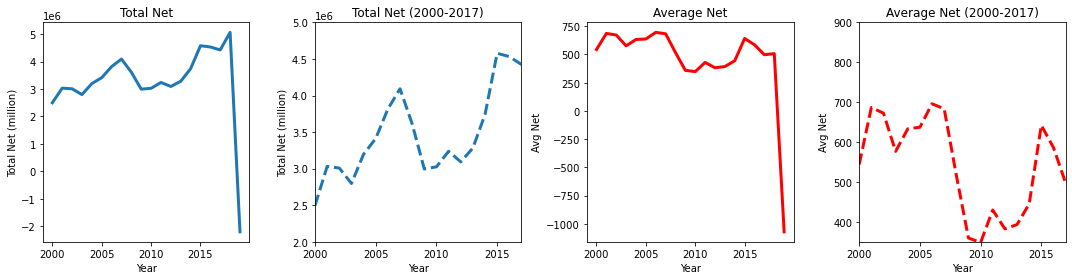

In [16]:
# Graph of Total and Average Netflows of foreign populations each year for inputted country
fig,axes = plt.subplots(nrows =1,ncols=4, figsize = (15,4))

axes[0].plot(totalnet, lw = 3)
axes[0].set_title("Total Net")
axes[0].set_ylabel("Total Net (million)")
axes[0].set_xlabel("Year")

axes[1].plot(totalnet, ls = "--", lw = 3)
axes[1].set_title("Total Net (2000-2017)")
axes[1].set_ylabel("Total Net (million)")
axes[1].set_xlabel("Year")
axes[1].set_xlim([2000,2017])
axes[1].set_ylim([2000000,5000000])

axes[2].plot(avgnet, color = "red", lw = 3)
axes[2].set_title("Average Net")
axes[2].set_ylabel("Avg Net")
axes[2].set_xlabel("Year")

axes[3].plot(avgnet, color = "red",ls="--", lw =3)
axes[3].set_title("Average Net (2000-2017)")
axes[3].set_ylabel("Avg Net")
axes[3].set_xlabel("Year")
axes[3].set_xlim([2000,2017])
axes[3].set_ylim([350,900])

plt.tight_layout()

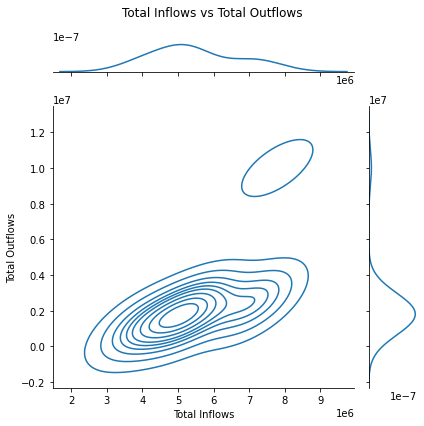

In [17]:
# TOTAL NET FLOWS (unlike balance of accounts) = Total Inflows - Total Outflows 
tnet = pd.concat([inftotal_df,outtotal_df],axis = 1)
tnet.columns = ["Total Inflows","Total Outflows"]
tnet
kgt = sns.jointplot(x = "Total Inflows", y = "Total Outflows", data = tnet, kind = "kde")
kgt.fig.suptitle("Total Inflows vs Total Outflows")
kgt.fig.tight_layout()

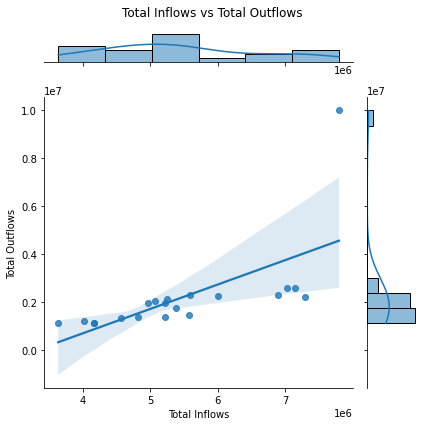

In [18]:
# TOTAL NET FLOWS (unlike balance of accounts) = Total Inflows - Total Outflows 
tnet = pd.concat([inftotal_df,outtotal_df],axis = 1)
tnet.columns = ["Total Inflows","Total Outflows"]
tnet
rgt = sns.jointplot(x = "Total Inflows", y = "Total Outflows", data = tnet, kind = "reg")
rgt.fig.suptitle("Total Inflows vs Total Outflows")
rgt.fig.tight_layout()

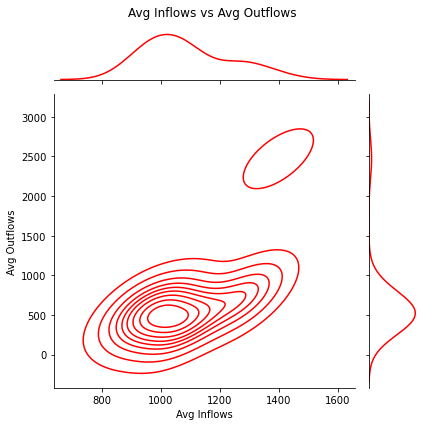

In [19]:
# AVERAGE NET FLOWS = Average Inflows - Average Outflows 
anet = pd.concat([infavg_df,outavg_df],axis = 1)
anet.columns = ["Avg Inflows","Avg Outflows"]
anet
kga = sns.jointplot(x = "Avg Inflows", y = "Avg Outflows", data = anet, kind = "kde", color = "red")
kga.fig.suptitle("Avg Inflows vs Avg Outflows")
kga.fig.tight_layout()

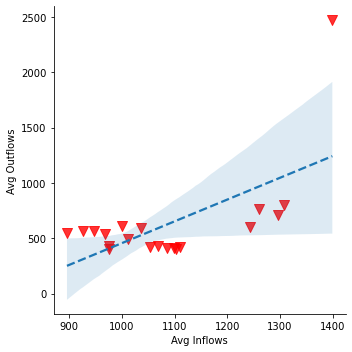

In [20]:
# AVERAGE NET FLOWS = Average Inflows - Average Outflows 
sns.lmplot(x = "Avg Inflows",y = "Avg Outflows", data = net, markers = "v", scatter_kws = {"s":100,"color":"red"},line_kws = {"ls":"--"})

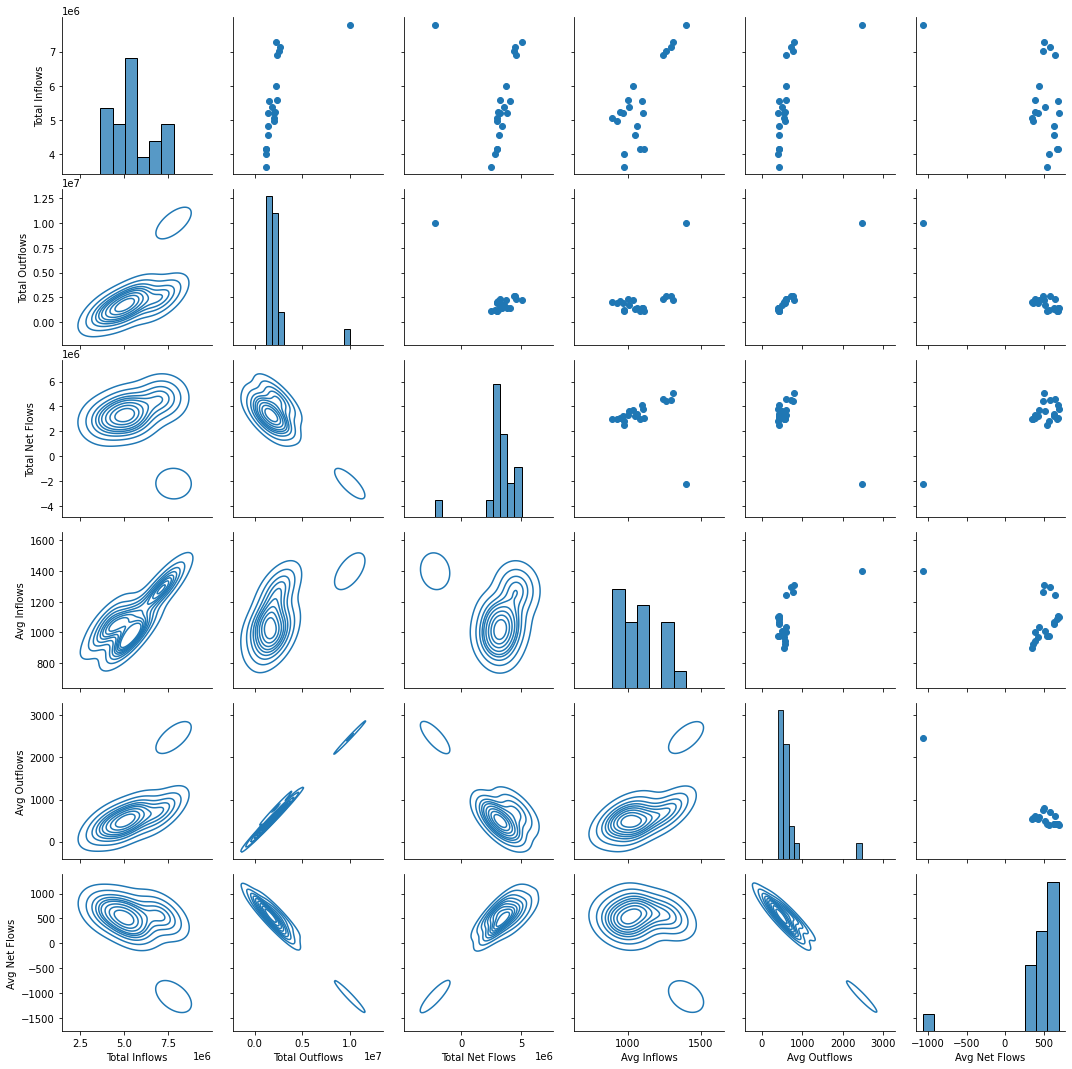

In [21]:
npg = sns.PairGrid(net)
npg.map_diag (sns.histplot)
npg.map_upper (plt.scatter)
npg.map_lower (sns.kdeplot)

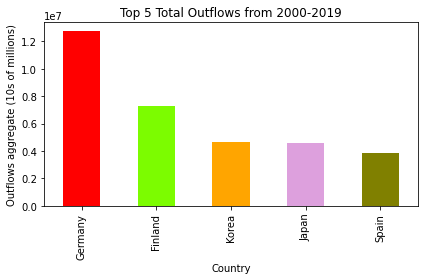

In [22]:
# Top 5 Largest Outflows
t5out = data2[data2["Variable"]=="Outflows of foreign population by nationality"].groupby("Country")["Value"].sum().nlargest(5)
t5outg = t5out.plot.bar(color = ["red","lawngreen","orange","plum","olive"])
t5outg.set_xlabel("Country")
t5outg.set_ylabel("Outflows aggregate (10s of millions)")
t5outg.set_title("Top 5 Total Outflows from 2000-2019")
plt.tight_layout()

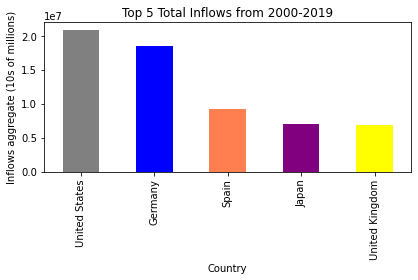

In [23]:
# Top 5 Largest Inflows
t5inf = data2[data2["Variable"]=="Inflows of foreign population by nationality"].groupby("Country")["Value"].sum().nlargest(5)
t5infg = t5inf.plot.bar(color = ["grey","blue","coral","purple","yellow"])
t5infg.set_xlabel("Country")
t5infg.set_ylabel("Inflows aggregate (10s of millions)")
t5infg.set_title("Top 5 Total Inflows from 2000-2019")
plt.tight_layout()

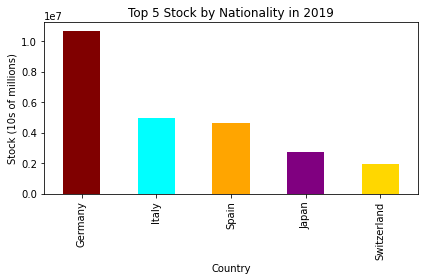

In [24]:
# Top 5 Largest Stock by Nationality in 2019
t5sn = data2[(data2["Year"] == 2019) & (data2["Variable"]=="Stock of foreign population by nationality")].groupby("Country")["Value"].sum().nlargest(5)
t5sng = t5sn.plot.bar(color = ["maroon","cyan","orange","purple","gold"])
t5sng.set_xlabel("Country")
t5sng.set_ylabel("Stock (10s of millions)")
t5sng.set_title("Top 5 Stock by Nationality in 2019")
plt.tight_layout()

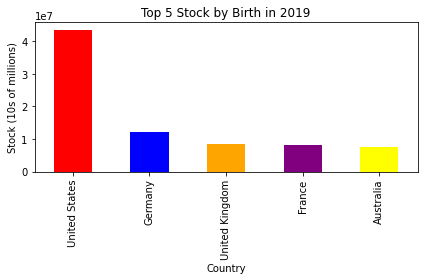

In [25]:
# Top 5 Largest Stock by Birth in 2019
t5sb = data2[(data2["Year"] == 2019) & (data2["Variable"]=="Stock of foreign-born population by country of birth")].groupby("Country")["Value"].sum().nlargest(5)
t5sbg = t5sb.plot.bar(color = ["red","blue","orange","purple","yellow"])
t5sbg.set_xlabel("Country")
t5sbg.set_ylabel("Stock (10s of millions)")
t5sbg.set_title("Top 5 Stock by Birth in 2019")
plt.tight_layout()

In [26]:
## This provides analysis into the inputted country by looking at:
## the INFLOWS and OUTFLOWS of the inputted country

# Code cleans up the country options
print("These are all of the countries we can explore!:\n\n"+str(country1).replace("[","").replace("]","").replace("'",""))

# Loop until inputted country matches the list of countries
while True:
    print("\nWhich country would you like to learn about? ")
    country = input().title()
    if country in country1:
        country2 = country
        break
    else:
        print("Try again")
        continue

# Variables 
output = data2[(data2["Country"]==country2)&(data2["Variable"]=="Inflows of foreign population by nationality")]
output2 = data2[(data2["Country"]==country2)&(data2["Variable"]=="Outflows of foreign population by nationality")]

# maxy and miny are the first and last year data was available
maxy = output["Year"].max()
miny = output["Year"].min()

# country_top5 looks for the top 5 nations sorted by total inflows 
# year_top5 ranks the years with the largest inflows
# avg is the average yearly inflows, total is the total inflows 

country_top5 = str(output.groupby("Country of birth/nationality")["Value"].sum().nlargest(5).round(2).to_dict()).replace("{","").replace("}","").replace("'","")
year_top5 = str(output.groupby("Year")["Value"].sum().nlargest(5).round(2).to_dict()).replace("{","").replace("}","")
avg = round(output.groupby("Year")["Value"].sum().mean(),2)
total = round(output["Value"].sum(),2)

# country_top5_2 looks for the top 5 nations sorted by total outflows 
# year_top5_2 ranks the years with the largest outflows
# avg2 is the average yearly inflows, total2 is the total outflows 

country_top5_2 = str(output2.groupby("Country of birth/nationality")["Value"].sum().nlargest(5).round(2).to_dict()).replace("{","").replace("}","").replace("'","")
year_top5_2 = str(output2.groupby("Year")["Value"].sum().nlargest(5).round(2).to_dict()).replace("{","").replace("}","")
avg2 = round(output2.groupby("Year")["Value"].sum().mean(),2)
total2 = round(output2["Value"].sum(),2)

# Output text
# Inflows
# Missing Data
if pd.isna(avg) == True:
    print("\n\nThere does not seem to be enough data on the inflows from {}!".format(country2))
else:
    
    print("""\n\nAwesome! You chose to learn more about {}.
    \n\nThese are the top five nationalities that immigrated into {} between {} and {}:
    \n{}
    \n\nThese are the the top five years that had the most immigration into {} between {} and {}:
    \n{}
    \n\nThere are on average {} inflows each year and a total of {} inflows to {} between {} and {}.""".format(country2,country2,miny,maxy,country_top5,country2, miny, maxy,year_top5,avg,total,country2,miny,maxy))
    print(str("\nThe nationality with the most immigrants to {} in one year is "+str(list(output[output["Value"]==output["Value"].max()]["Country of birth/nationality"]))+"; which happend in "+str(list(output[output["Value"]==output["Value"].max()]["Year"]))+". There was a total of "+str(list(output[output["Value"]==output["Value"].max()]["Value"]))+" immigrants in that year.").format(country2).replace("'","").replace("[","").replace("]",""))

# Outflows
# Missing Data
if pd.isna(avg2) == True:
    print("\n\nThere does not seem to be enough data on the outflows from {}!".format(country2))
else:

    print("""\n\nThese are the top five nationalities that emigrated from {} between {} and {}:
    \n{}
    \n\nThese are the the top five years that had the most emigration from {} between {} and {}:
    \n{}
    \n\nThere are on average {} outflows each year and a total of {} outflows from {} between {} and {}.""".format(country2,miny,maxy,country_top5_2,country2, miny, maxy,year_top5_2,avg2,total2,country2,miny,maxy))
    print(str("\nThe nationality with the most emigrants from {} in one year is "+str(list(output2[output2["Value"]==output2["Value"].max()]["Country of birth/nationality"]))+"; which happend in "+str(list(output2[output2["Value"]==output2["Value"].max()]["Year"]))+". There was a total of "+str(list(output2[output2["Value"]==output2["Value"].max()]["Value"]))+" emigrants in that year.").format(country2).replace("'","").replace("[","").replace("]",""))



These are all of the countries we can explore!:

Australia, Austria, Belgium, Canada, Czech Republic, Denmark, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Italy, Japan, Korea, Luxembourg, Mexico, Netherlands, New Zealand, Norway, Poland, Slovak Republic, Spain, Sweden, Switzerland, Turkey, United Kingdom, United States, Chile, Estonia, Slovenia, Israel, Portugal, Latvia

Which country would you like to learn about? 
meXiCo


Awesome! You chose to learn more about Mexico.
    

These are the top five nationalities that immigrated into Mexico between 2007 and 2019:
    
United States: 71926.0, Venezuela: 33769.0, Cuba: 26521.0, Colombia: 26389.0, China: 24933.0
    

These are the the top five years that had the most immigration into Mexico between 2007 and 2019:
    
2013: 62989.0, 2014: 43481.0, 2019: 40543.0, 2018: 38673.0, 2016: 35905.0
    

There are on average 30926.15 inflows each year and a total of 402040.0 inflows to Mexico between 2007 and 2019.

The national

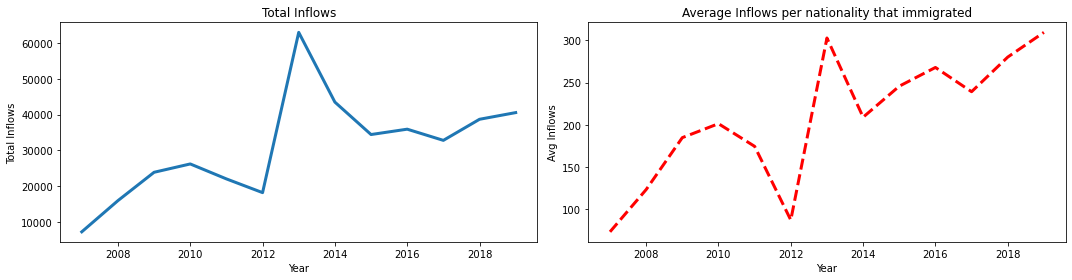

In [27]:
# Graph of Total and Average Inflows of foreign populations each year for inputted country
if pd.isna(avg) == True:
    print("\n\nThere does not seem to be enough data on the inflows from {}!".format(country2))
else:
    
    cinftotal_df = pd.DataFrame(data2[(data2["Country"]==country2)&(data2["Variable"]=="Inflows of foreign population by nationality")].groupby("Year")["Value"].sum().round(2))
    cinfavg_df = pd.DataFrame(data2[(data2["Country"]==country2)&(data2["Variable"]=="Inflows of foreign population by nationality")].groupby("Year")["Value"].mean().round(2)) 
    
    fig,axes = plt.subplots(nrows =1,ncols=2, figsize=(15,4))
    
    axes[0].plot(cinftotal_df, lw = 3)
    axes[0].set_title("Total Inflows")
    axes[0].set_ylabel("Total Inflows")
    axes[0].set_xlabel("Year")
    
    axes[1].plot(cinfavg_df, color = "red", lw =3, ls = "--")
    axes[1].set_title("Average Inflows per nationality that immigrated")
    axes[1].set_ylabel("Avg Inflows")
    axes[1].set_xlabel("Year")
    
    plt.tight_layout()

In [28]:
# Graph of Total and Average Outflows of foreign populations each year for inputted country
if pd.isna(avg2) == True:
    print("\n\nThere does not seem to be enough data on the outflows from {}!".format(country2))
else:

    couttotal_df = pd.DataFrame(data2[(data2["Country"]==country2)&(data2["Variable"]=="Outflows of foreign population by nationality")].groupby("Year")["Value"].sum().round(2))
    coutavg_df = pd.DataFrame(data2[(data2["Country"]==country2)&(data2["Variable"]=="Outflows of foreign population by nationality")].groupby("Year")["Value"].mean().round(2))
    
    fig,axes = plt.subplots(nrows =1,ncols=2, figsize = (15,4))
    
    axes[0].plot(couttotal_df, lw = 3)
    axes[0].set_title("Total Outflows")
    axes[0].set_ylabel("Total Outflows (billion)")
    axes[0].set_xlabel("Year")
    
    axes[1].plot(coutavg_df, color = "red", lw = 3)
    axes[1].set_title("Average Outflows")
    axes[1].set_ylabel("Avg Outflows")
    axes[1].set_xlabel("Year")
    
    
    
    plt.tight_layout()



There does not seem to be enough data on the outflows from Mexico!


In [35]:
# TOTAL NET FLOWS = Total Inflows - Total Outflows 
# TOTAL AVERAGE FLOWS = Average Inflows - Average Outflows
if pd.isna(avg2) == True:
    print("\n\nThere does not seem to be enough data on the outflows from {}!".format(country2))
else:
    ctotalnet = cinftotal_df.subtract(couttotal_df)
    cavgnet = cinfavg_df.subtract(coutavg_df)
    cnet = pd.concat([cinftotal_df,couttotal_df,ctotalnet,cinfavg_df,coutavg_df,cavgnet],axis = 1)
    cnet.columns = ["Total Inflows","Total Outflows","Total Net Flows","Avg Inflows","Avg Outflows","Avg Net Flows"]
    cnet



There does not seem to be enough data on the outflows from Mexico!


In [36]:
# Graph of Total and Average Netflows of foreign populations each year for inputted country
if pd.isna(avg2) == True:
    print("\n\nThere does not seem to be enough data on the outflows from {}!".format(country2))
elif pd.isna(avg) == True:
    print("\n\nThere does not seem to be enough data on the inflows from {}!".format(country2))
else:

    fig,axes = plt.subplots(nrows =1,ncols=2, figsize = (15,4))
    
    axes[0].plot(ctotalnet, lw = 3)
    axes[0].set_title("Total Netflows")
    axes[0].set_ylabel("Total Netflows")
    axes[0].set_xlabel("Year")
    
    axes[1].plot(cavgnet, color = "red", lw = 3)
    axes[1].set_title("Average Netflows")
    axes[1].set_ylabel("Avg Netflows")
    axes[1].set_xlabel("Year")
    
    plt.tight_layout()



There does not seem to be enough data on the outflows from Mexico!


In [37]:
# Top 5 Largest Outflows from Inputted Country
if pd.isna(avg2) == True:
    print("\n\nThere does not seem to be enough data on the outflows from {}!".format(country2))
else:
    t5cout = output2.groupby("Country of birth/nationality")["Value"].sum().nlargest(5)
    t5coutg = t5cout.plot.bar(color = ["red","blue","orange","purple","yellow"])
    t5coutg.set_xlabel("Country")
    t5coutg.set_ylabel("Outflows aggregate")
    t5coutg.set_title("Top 5 Total Outflows from 2000-2019")
    plt.tight_layout()



There does not seem to be enough data on the outflows from Mexico!


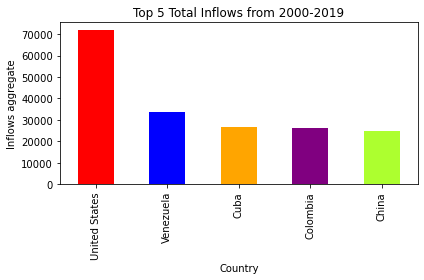

In [38]:
# Top 5 Largest Inflows to Inputted Country
if pd.isna(avg) == True:
    print("\n\nThere does not seem to be enough data on the inflows from {}!".format(country2))
else:
    t5cinf = output.groupby("Country of birth/nationality")["Value"].sum().nlargest(5)
    t5cinfg = t5cinf.plot.bar(color = ["red","blue","orange","purple","greenyellow"])
    t5cinfg.set_xlabel("Country")
    t5cinfg.set_ylabel("Inflows aggregate")
    t5cinfg.set_title("Top 5 Total Inflows from 2000-2019")
    plt.tight_layout()

In [39]:
# STOCK OVER TIME (BY NATIONALITY)
stocknc = data2[(data2["Country"]==country2)&(data2["Variable"]=="Stock of foreign population by nationality")].groupby("Year")["Value"].sum()
stocknc

Year
2010    262645.0
2011    281019.0
2012    303923.0
2013    296429.0
2015    325960.0
2016    355187.0
2017    381742.0
2018    423830.0
2019    461981.0
2020    480321.0
Name: Value, dtype: float64

In [40]:
# STOCK OVER TIME (BY BIRTH)
stockbc = data2[(data2["Country"]==country2)&(data2["Variable"]=="Stock of foreign-born population by country of birth")].groupby("Year")["Value"].sum()
stockbc

Year
2000     490152.0
2001       1687.0
2010     961065.0
2011       1236.0
2015    1007063.0
2016       1597.0
2018     993213.0
2020     854076.0
Name: Value, dtype: float64